# ANALYSING FIXED PENALTY NOTICES DATASET

This dataset shows fines issued to offenders in the borough. Fines are normally issued to commercial premises for 
improper disposal of waste in the streets and littering by passers-by.

# SECTION A

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import pysal
from shapely.geometry import Point

In [2]:
#reading dataframe from another notebook titled ALL FILES
%store -r penalties

In [3]:
#reading dataframe from another notebook titled LICENCE
%store -r complete_wards

In [4]:
#reading shapefile from another notebook titled ACORN
%store -r london

In [5]:
#checking contents of dataframe
penalties.head(1)

,TradingName,ServiceRequest,Street,Ward,StressArea,Lat,Long,ReceivedDate,ReceivedDayOfWeek,ReceivedDayOfWeekNumber,ReceivedMonth,ReceivedYear,ReceivedMonthNumber,ReceivedTime,ReceivedTimeHourBand,ContactMethod
0,NaN,Street Litter Ticket - Commercial (�50),Wells Street,West End,West End,51.516602,-0.137578,2015-01-05,Mon,1,Jan,2015,1,09:50,09:00 - 10:00,Self Generated


In [6]:
penalties.ServiceRequest.unique()

array(['Street Litter Ticket - Commercial (\xa350)',
       'FPN for Smoking (\xa350)', 'CN12 - Waste Transfer FPN - \xa3300',
       'FPN Dog Fouling (\xa380)', 'CN1 - Dog Fouling', 'CN1 - Commercial',
       'CN12 - Waste Transfer (FPN)', 'Smoking FPN',
       'FPN for Littering (general)',
       'CN9 - Waste Receptacles - Commercial', 'Fly-tipping - Commercial',
       'Littering only FPN'], dtype=object)

In [7]:
#filtering the timehourband for evening economy
evening_FPN = penalties[(penalties.ReceivedTime>='18:00') & (penalties.ReceivedTime<='20:00')]

In [8]:
#filtering complaints made at night. That is between 20:00 and 04:00
ngt_FPN1 = penalties[(penalties.ReceivedTime>='20:00') & (penalties.ReceivedTime<='23:59')]
ngt_FPN2 = penalties[(penalties.ReceivedTime>='00:00') & (penalties.ReceivedTime<='04:00')]

In [9]:
#joining the two segments of received time to represent night-time complaints
night_FPN = pd.concat([ngt_FPN1,ngt_FPN2])

In [13]:
#create copy of dataframe
pen_eve = evening_FPN.copy()
pen_ngt = night_FPN.copy()

In [14]:
#create list of values to replace original values in column. The key is the original entry in the dataset and the value
#is the renamed entering in order to remove the amount and any repetition of fines
val = {'Street Litter Ticket - Commercial (\xa350)':'Street Litter Ticket - Commercial',
       'FPN for Smoking (\xa350)':'Smoking', 'CN12 - Waste Transfer FPN - \xa3300':'Waste Transfer',
       'FPN Dog Fouling (\xa380)':'Dog Fouling', 'CN1 - Dog Fouling':'Dog Fouling', 'CN1 - Commercial':'Commercial',
       'CN12 - Waste Transfer (FPN)':'Waste Transfer', 'Smoking FPN':'Smoking',
       'FPN for Littering (general)':'Littering (general)',
       'CN9 - Waste Receptacles - Commercial':'Waste Receptacles - Commercial', 'Fly-tipping - Commercial':'Fly-tipping - Commercial',
       'Littering only FPN':'Littering only'}

In [15]:
#assign new values to column entry for evening
pen_eve['ServiceRequest'].replace(val, inplace=True)

In [16]:
#assign new values to column entry for night
pen_ngt['ServiceRequest'].replace(val, inplace=True)

In [17]:
#print output
pen_eve.head(2)

,TradingName,ServiceRequest,Street,Ward,StressArea,Lat,Long,ReceivedDate,ReceivedDayOfWeek,ReceivedDayOfWeekNumber,ReceivedMonth,ReceivedYear,ReceivedMonthNumber,ReceivedTime,ReceivedTimeHourBand,ContactMethod,geometry
773,NatWest Bank Plc,Street Litter Ticket - Commercial,Victoria Street,Vincent Square,Not Recorded,51.496452,-0.141079,2015-07-25,Sat,6,Jul,2015,7,19:11,19:00 - 20:00,Not Recorded,POINT (-0.1410795 51.49645158)
776,Starbucks Coffee Company,Street Litter Ticket - Commercial,Villiers Street,St James`s,Not Recorded,51.508786,-0.124466,2015-07-25,Sat,6,Jul,2015,7,19:37,19:00 - 20:00,Not Recorded,POINT (-0.12446644 51.50878562)


In [18]:
#print output
pen_ngt.head(2)

,TradingName,ServiceRequest,Street,Ward,StressArea,Lat,Long,ReceivedDate,ReceivedDayOfWeek,ReceivedDayOfWeekNumber,ReceivedMonth,ReceivedYear,ReceivedMonthNumber,ReceivedTime,ReceivedTimeHourBand,ContactMethod,geometry
548,NaN,Street Litter Ticket - Commercial,Warwick Avenue,Little Venice,Not Recorded,51.525148,-0.188290,2015-05-27,Wed,3,May,2015,5,23:31,23:00 - 00:00,Internally Generated,POINT (-0.18829033 51.52514793)
678,NaN,Street Litter Ticket - Commercial,Westbourne Grove,Bayswater,Not Recorded,51.514814,-0.198688,2015-06-29,Mon,1,Jun,2015,6,22:34,22:00 - 23:00,Not Recorded,POINT (-0.19868818 51.51481389)


In [20]:
#creating dataframe of total count of service request 
df = pd.DataFrame(pen_eve.groupby(['Ward','ServiceRequest'])['ServiceRequest'].count())

In [21]:
#renaming column
df = df.rename(columns={'ServiceRequest':'Total'})

In [22]:
#resetting index
df = df.reset_index()

# SECTION B

This section shows the plots of service request in the FPN dataframe. It shows a heatmap plot for all wards, and 
another plot showing for stress area.

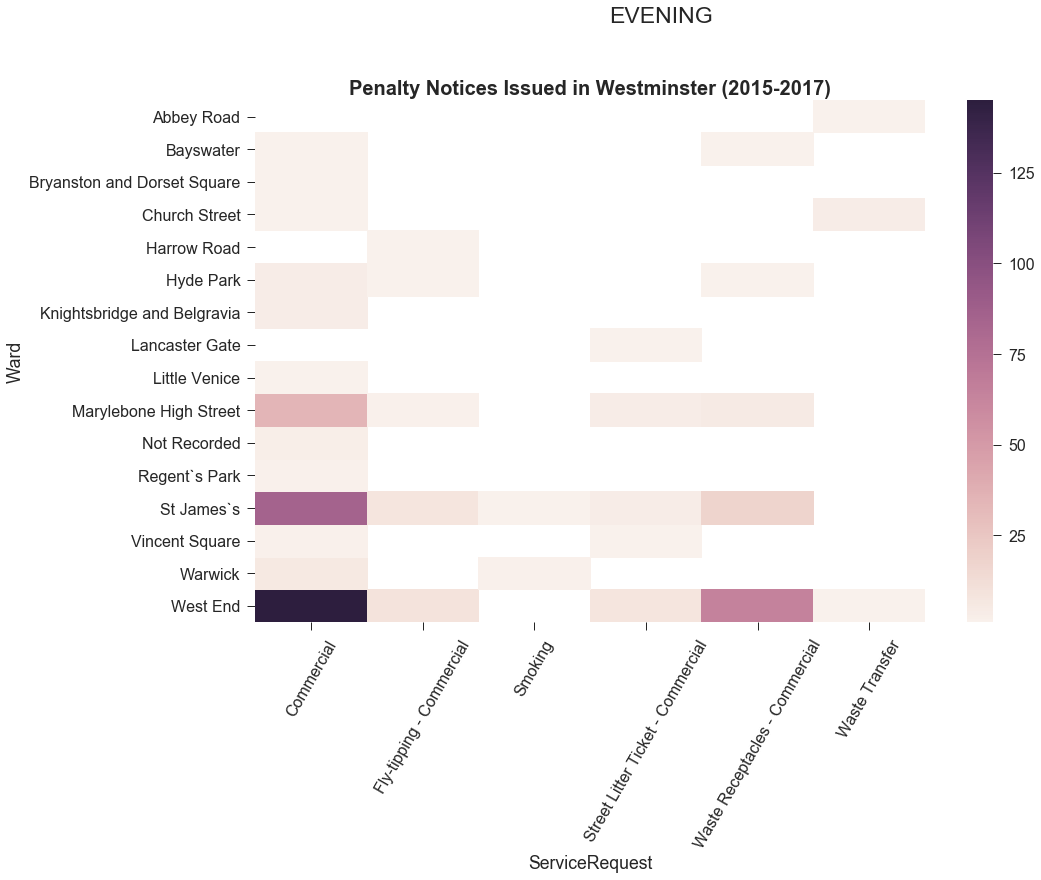

In [23]:
#plotting heatmap
new_df = df.pivot(index = 'Ward', columns = 'ServiceRequest', 
                   values = 'Total')
plt.figure(figsize=(15,10))
sns.heatmap(new_df)
plt.title('Penalty Notices Issued in Westminster (2015-2017)',fontsize=20,fontweight='bold')
plt.suptitle('EVENING')
plt.subplots_adjust(top=0.85)
plt.xticks(rotation=60)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/fines1.png',bbox_inches="tight")

In [24]:
#creating dataframe of total count of service request 
df2 = pd.DataFrame(pen_ngt.groupby(['Ward','ServiceRequest'])['ServiceRequest'].count())

In [25]:
#renaming column
df2 = df2.rename(columns={'ServiceRequest':'Total'})

In [26]:
#resetting index
df2 = df2.reset_index()

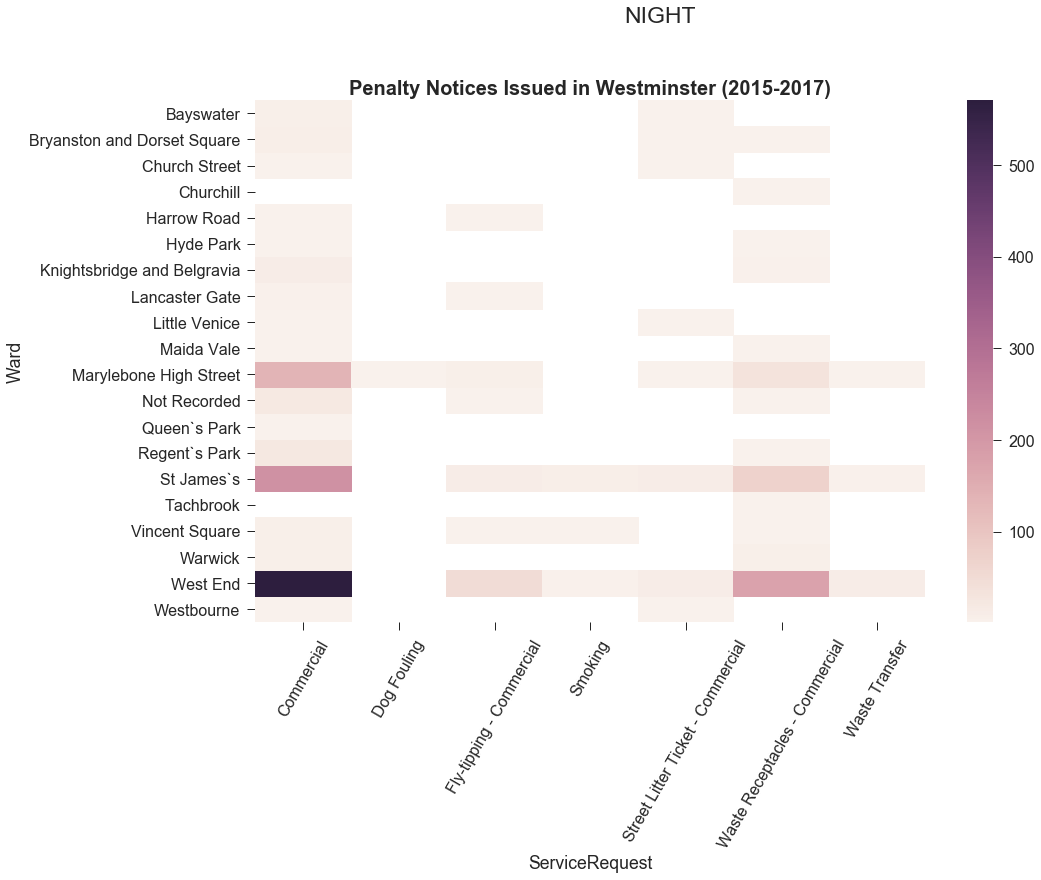

In [27]:
#plotting heatmap
new_df2 = df2.pivot(index = 'Ward', columns = 'ServiceRequest', 
                   values = 'Total')
plt.figure(figsize=(15,10))
plt.title('Penalty Notices Issued in Westminster (2015-2017)',fontsize=20,fontweight='bold')
plt.suptitle('NIGHT')
plt.subplots_adjust(top=0.85)
sns.heatmap(new_df2)
plt.xticks(rotation=60)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/fines2.png',bbox_inches="tight")

# SECTION C

STRESS AREA ANALYSIS

In [28]:
#creating dataframe of total count of service request for evening
stress_eve_df = pd.DataFrame(pen_eve.groupby(['StressArea','ServiceRequest'])['ServiceRequest'].count())
#creating dataframe of total count of service request for night
stress_ngt_df = pd.DataFrame(pen_ngt.groupby(['StressArea','ServiceRequest'])['ServiceRequest'].count())

In [29]:
#renaming column
stress_eve_df2 = stress_eve_df.rename(columns={'ServiceRequest':'Total'})
#renaming column
stress_ngt_df2 = stress_ngt_df.rename(columns={'ServiceRequest':'Total'})

In [30]:
#resetting index
stress_eve_df2 = stress_eve_df2.reset_index()
#resetting index
stress_ngt_df2 = stress_ngt_df2.reset_index()

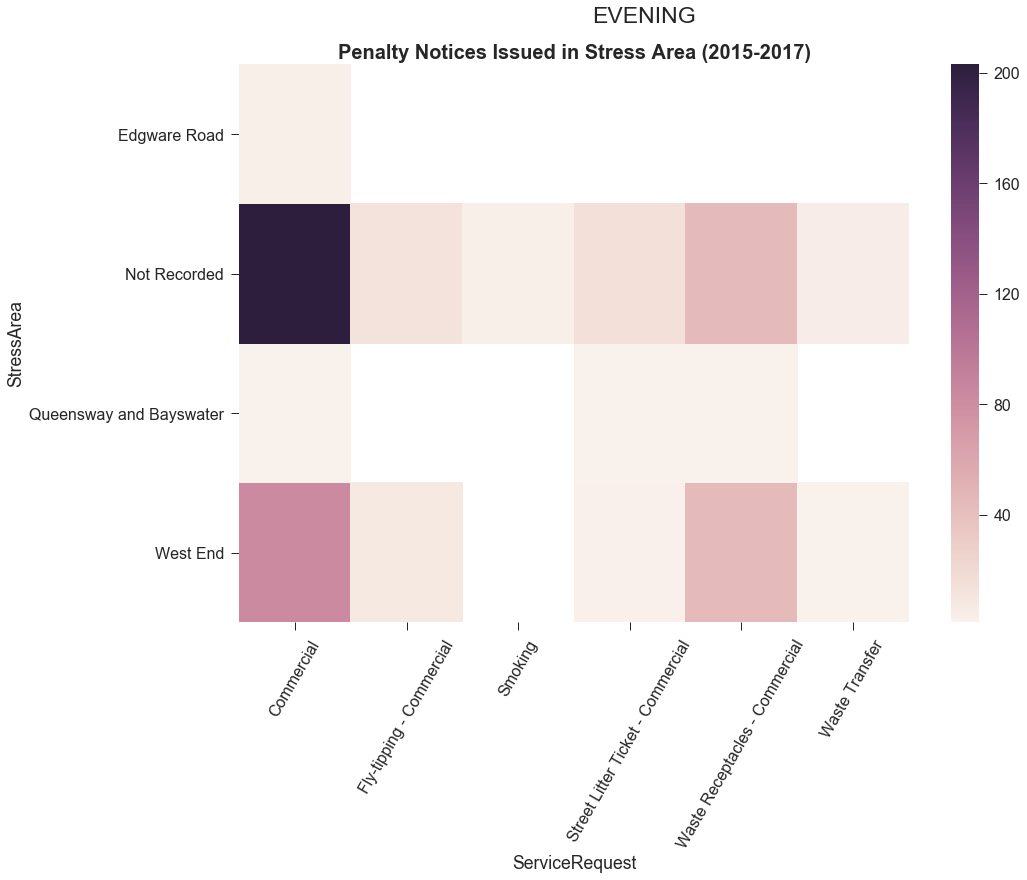

In [31]:
#plotting heatmap
stress_new_df = stress_eve_df2.pivot(index = 'StressArea', columns = 'ServiceRequest', 
                   values = 'Total')
plt.figure(figsize=(15,10))
plt.title('Penalty Notices Issued in Stress Area (2015-2017)',fontsize=20,fontweight='bold')
plt.suptitle('EVENING')
plt.subplots_adjust(top=0.90)
sns.heatmap(stress_new_df)
plt.xticks(rotation=60)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/stress_fines1.png',bbox_inches="tight")

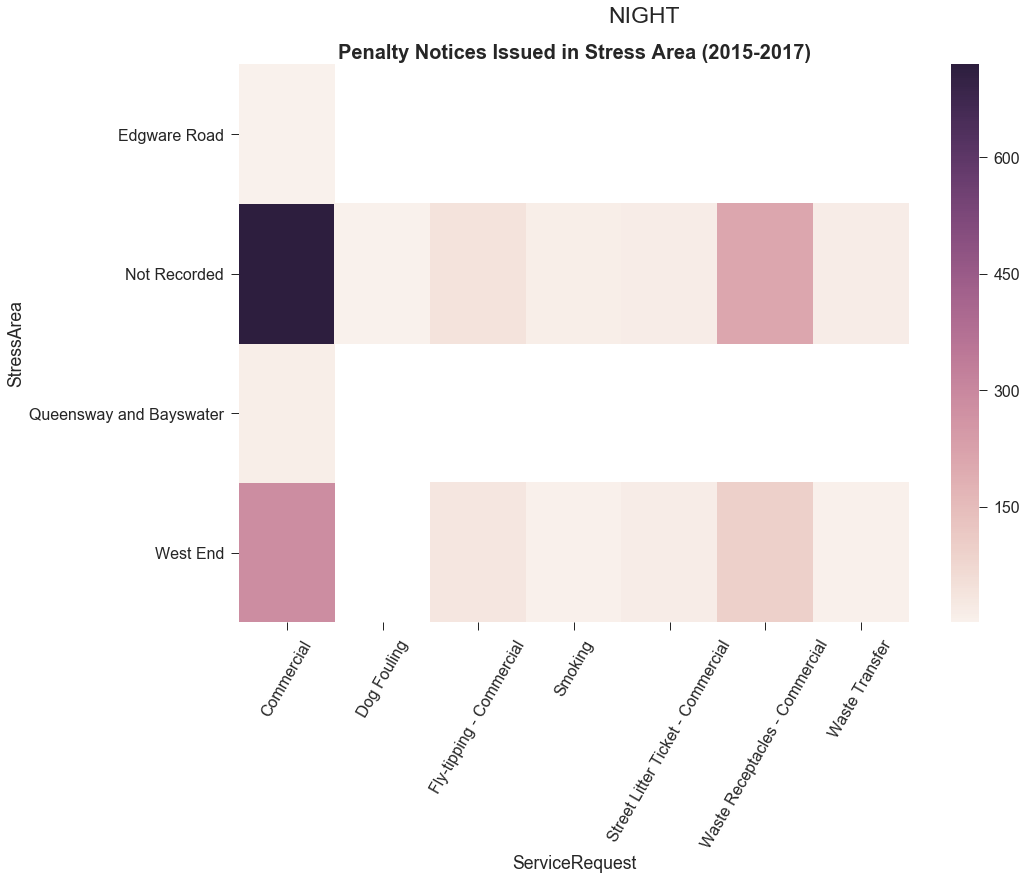

In [32]:
#plotting heatmap
stress_new_df2 = stress_ngt_df2.pivot(index = 'StressArea', columns = 'ServiceRequest', 
                   values = 'Total')
plt.figure(figsize=(15,10))
plt.title('Penalty Notices Issued in Stress Area (2015-2017)',fontsize=20,fontweight='bold')
plt.suptitle('NIGHT')
plt.subplots_adjust(top=0.90)
sns.heatmap(stress_new_df2)
plt.xticks(rotation=60)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/stress_fines2.png',bbox_inches="tight")

# SECTION D

This section computes count for evening and night-time fines in Westminster per ward. The new created dataframe is used for 
further analysis in R. This dataframe is exported to DATAFRAME FOR ALL notebook file to concatenate with other 
dataframes

In [60]:
#counting evening service request for each ward in Westminster
pen1 = pd.DataFrame(evening_FPN.groupby('Ward')['ServiceRequest'].count())

In [61]:
#renaming column
pen1 = pen1.rename(columns={'ServiceRequest':'Evening_fines'})

In [62]:
#counting night service request for each ward in Westminster
pen2 = pd.DataFrame(night_FPN.groupby('Ward')['ServiceRequest'].count())

In [63]:
#renaming column
pen2 = pen1.rename(columns={'ServiceRequest':'Night_fines'})

In [64]:
#merging evening and night count service requests
fine_merge = pd.concat([pen1,pen2], axis=1)

In [68]:
#storing dataframe to use in DATAFRAME FOR ALL notebook file
%store fine_merge

Stored 'fine_merge' (DataFrame)
